In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
#required libraries 




In [6]:
 #select start date for correlation window as well as list of tickers
start = datetime(2020, 12, 1)
symbols_list = ['BTC-USD','GLD', 'GS', 'JPM', 'SPY','TSLA', 'XLF' ,'GME', '^VIX']
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]

 



In [11]:
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
corr_df.index.name = None
corr_df.head(20)

Symbol,BTC-USD,GLD,GME,GS,JPM,SPY,TSLA,XLF,^VIX
BTC-USD,1.000000,-0.613060,0.409423,0.958565,0.954211,0.878141,0.361284,0.934161,0.106908
GLD,-0.613060,1.000000,-0.468563,-0.642613,-0.705331,-0.456695,0.222877,-0.727805,-0.116437
GME,0.409423,-0.468563,1.000000,0.432762,0.404445,0.280429,0.172311,0.377016,0.704670
GS,0.958565,-0.642613,0.432762,1.000000,0.987092,0.848546,0.372158,0.969762,0.151552
JPM,0.954211,-0.705331,0.404445,0.987092,1.000000,0.839300,0.284405,0.987856,0.096287
SPY,0.878141,-0.456695,0.280429,0.848546,0.839300,1.000000,0.574752,0.811310,-0.131687
TSLA,0.361284,0.222877,0.172311,0.372158,0.284405,0.574752,1.000000,0.193062,0.097077
XLF,0.934161,-0.727805,0.377016,0.969762,0.987856,0.811310,0.193062,1.000000,0.035928
^VIX,0.106908,-0.116437,0.704670,0.151552,0.096287,-0.131687,0.097077,0.035928,1.000000


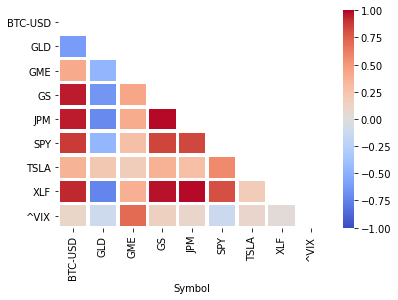

In [12]:
 #take the bottom triangle since it repeats itself
 mask = np.zeros_like(corr_df)
 mask[np.triu_indices_from(mask)] = True
 #generate plot
 seaborn.heatmap(corr_df, cmap = 'coolwarm', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)

 plt.yticks(rotation=0) 
 plt.xticks(rotation=90) 
 plt.show()